# Obtener datos de divisas de varios países desde Quandl con Python y Pandas

## Obteniendo los datos de una fecha inicial hasta la fecha final

In [1]:
#Importando librería pandas y quandl
import pandas as pd 
import quandl 

In [2]:
#Importando librería matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Fecha de inicio 1ero de Enero de 2016
#Fecha fin de 24 de Mayo de 2018
start = pd.to_datetime("2016-01-01")
end = pd.to_datetime("2018-05-24")

In [4]:
# Se obtiene los datos de divisas con respecto a su moneda de Venezuela (Dicom y Dolar Today),
# Brasil, Chile, Mexico y Argentina.
dicom = quandl.get("BUNDESBANK/BBEX3_M_VEF_USD_CA_AB_B09",start_date=start,end_date=end)
dtday = quandl.get("DOLARTODAY/BSF_USD",start_date=start,end_date=end)
brasil = quandl.get("BUNDESBANK/BBEX3_D_BRL_USD_CA_AC_000",start_date=start,end_date=end)
chile = quandl.get("BUNDESBANK/BBEX3_D_CLP_USD_CA_AC_000",start_date=start,end_date=end)
mexico = quandl.get("BUNDESBANK/BBEX3_D_MXN_USD_CA_AA_000",start_date=start,end_date=end)
argentina = quandl.get("BUNDESBANK/BBEX3_M_ARS_EUR_CA_AB_A01",start_date=start,end_date=end)

In [5]:
#Valor de dicom
dicom.head()

,Value
Date,
2016-01-31,199.5095
2016-02-29,205.3881
2016-03-31,272.9123
2016-04-30,378.3788
2016-05-31,531.0156


In [6]:
# Valor de Dolar Today
dtday.head()

,Exchange
Date,
2016-01-01,833.33
2016-01-02,833.33
2016-01-03,833.33
2016-01-04,845.07
2016-01-05,845.07


Como se observa, las dos tablas reflejan datos con columnas de nombres diferentes aunque son lo mismo.

### Los datos de los otros países

In [7]:
#Datos de Argentina
argentina.head()

,Value
Date,
2016-01-31,15.1592
2016-02-29,17.2015
2016-03-31,16.7580
2016-04-30,16.3205
2016-05-31,15.5958


In [8]:
argentina.rename(columns={'Value':'Argentina'},inplace=True)
argentina.head()

,Argentina
Date,
2016-01-31,15.1592
2016-02-29,17.2015
2016-03-31,16.7580
2016-04-30,16.3205
2016-05-31,15.5958


In [9]:
# Datos de Brasil
brasil.head()

,Value
Date,
2016-01-04,4.03835
2016-01-05,4.01110
2016-01-06,4.03000
2016-01-07,4.04720
2016-01-08,4.02470


In [10]:
brasil.rename(columns={'Value':'Brasil'},inplace=True)
brasil.head()

,Brasil
Date,
2016-01-04,4.03835
2016-01-05,4.01110
2016-01-06,4.03000
2016-01-07,4.04720
2016-01-08,4.02470


In [11]:
# Datos de Chile
chile.head()

,Value
Date,
2016-01-08,721.31
2016-01-15,725.98
2016-01-22,726.63
2016-01-29,711.72
2016-02-05,698.49


In [12]:
chile.rename(columns={'Value':'Chile'},inplace=True)
chile.head()

,Chile
Date,
2016-01-08,721.31
2016-01-15,725.98
2016-01-22,726.63
2016-01-29,711.72
2016-02-05,698.49


In [13]:
# Datos de Mexico
mexico.head()

,Value
Date,
2016-01-08,17.9010
2016-01-15,18.2425
2016-01-22,18.4250
2016-01-29,18.1420
2016-02-05,18.3970


In [14]:
#Se renombra la columna Value con el nombre del país
mexico.rename(columns={'Value':'Mexico'},inplace=True)
mexico.head()

,Mexico
Date,
2016-01-08,17.9010
2016-01-15,18.2425
2016-01-22,18.4250
2016-01-29,18.1420
2016-02-05,18.3970


En los demás casos la columna Value se encuentra en las tablas de los demás países

## Crear un portafolio con los datos de todos los países.

In [15]:
#Se concatena en un nuevo dataframe los datos de los países
all_pos_val = [dicom["Value"],
               dtday["Exchange"],
               argentina["Argentina"],
               brasil["Brasil"],
               chile["Chile"],
               mexico["Mexico"]]
portfolio_val = pd.concat(all_pos_val,axis=1)

In [16]:
# Se muestra el nuevo dataframe
portfolio_val.head()

,Value,Exchange,Argentina,Brasil,Chile,Mexico
Date,,,,,,
2016-01-01,NaN,833.33,NaN,NaN,NaN,NaN
2016-01-02,NaN,833.33,NaN,NaN,NaN,NaN
2016-01-03,NaN,833.33,NaN,NaN,NaN,NaN
2016-01-04,NaN,845.07,NaN,4.03835,NaN,NaN
2016-01-05,NaN,845.07,NaN,4.01110,NaN,NaN


Se descarta los campos NaN y se renombra las columnas.

In [17]:
portfolio_val.dropna(inplace=True)
portfolio_val.rename(columns={'Value':'Dicom','Exchange':'Dolar Today'},inplace=True)
portfolio_val.head()

,Dicom,Dolar Today,Argentina,Brasil,Chile,Mexico
Date,,,,,,
2016-02-29,205.3881,1089.66,17.2015,3.9793,689.18,18.0970
2016-03-31,272.9123,1172.55,16.7580,3.5586,675.10,17.2800
2016-05-31,531.0156,1017.54,15.5958,3.5948,690.27,18.4655
2016-06-30,628.3434,1043.64,16.6403,3.2095,661.49,18.2535
2016-08-31,645.3791,1028.85,16.6693,3.2400,673.17,18.8440


Text(0.5,1,'Valor de divisas ')

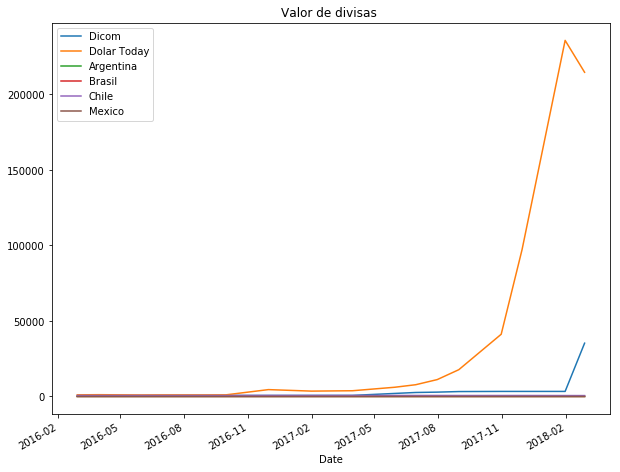

In [18]:
portfolio_val.plot(figsize=(10,8))
plt.title("Valor de divisas ")

 Esta es la gráfica de todas las cotizaciones, sólo resaltan las de Venezuela por el problema de la escala

Text(0.5,1,'Dolar vs Peso Argentino')

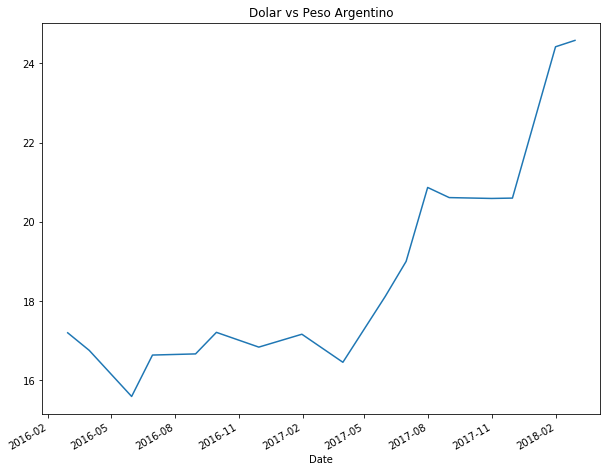

In [19]:
#Gráfica de cotización de Argentina
portfolio_val["Argentina"].plot(figsize=(10,8))
plt.title("Dolar vs Peso Argentino")

Text(0.5,1,'Dolar vs Real Brasileño')

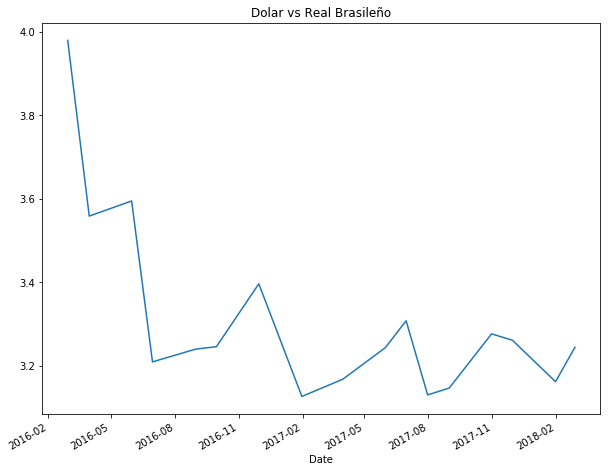

In [20]:
#Gráfica de cotización de Brasil
portfolio_val["Brasil"].plot(figsize=(10,8))
plt.title("Dolar vs Real Brasileño")

Text(0.5,1,'Dolar vs Peso Chile')

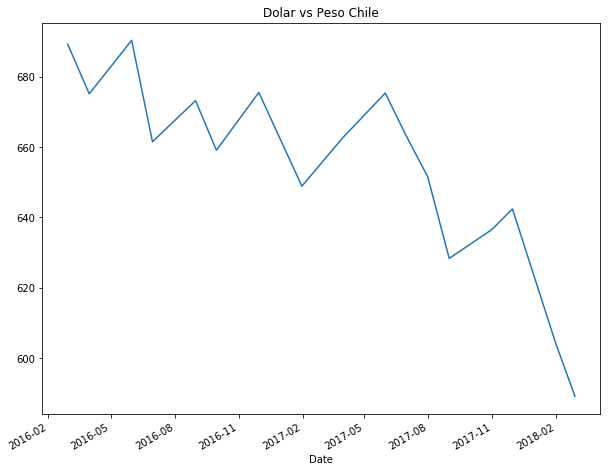

In [21]:
#Gráfica de cotización de Chile
portfolio_val["Chile"].plot(figsize=(10,8))
plt.title("Dolar vs Peso Chile")

Text(0.5,1,'Dolar vs Peso Mejicano')

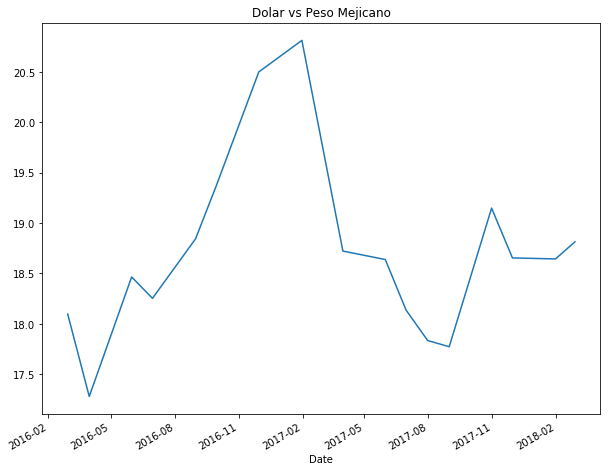

In [22]:
#Gráfica de cotización de Mexico
portfolio_val["Mexico"].plot(figsize=(10,8))
plt.title("Dolar vs Peso Mejicano")

Text(0.5,1,'Dolar vs Bolivar')

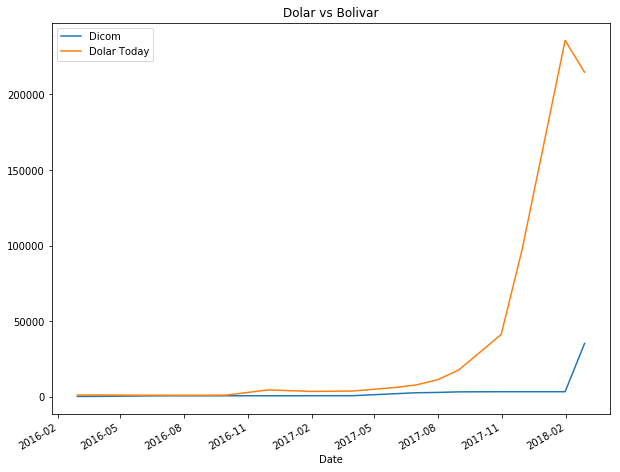

In [23]:
#Gráfica de cotización de Venezuela
portfolio_val.drop(["Argentina","Brasil","Chile","Mexico"],axis=1).plot(figsize=(10,8))
plt.title("Dolar vs Bolivar")

### Ahora se hacen las gráficas de manera individual de Venezuela

In [24]:
dicom.rename(columns={"Value":"Dicom"},inplace=True)
dtday.rename(columns={"Exchange":"Dolar Today"},inplace=True)

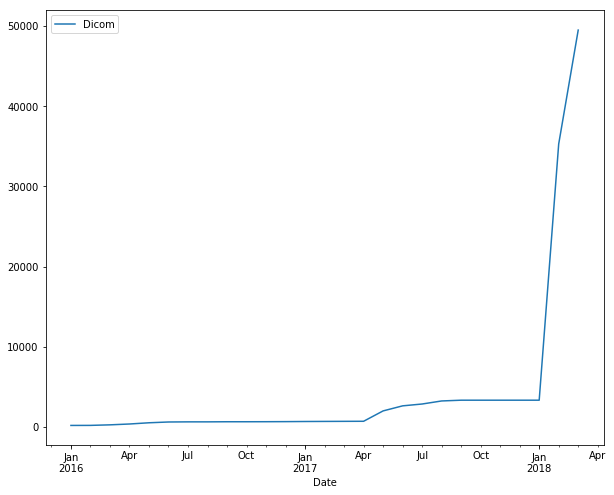

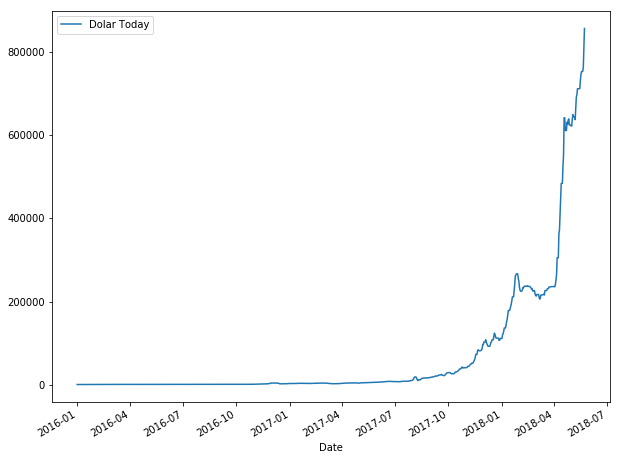

In [25]:
dicom.plot(figsize=(10,8))
dtday.plot(figsize=(10,8))